<a href="https://colab.research.google.com/github/NADARPRIYAEBANEZAR/DSAISEMIMINIPROJECT/blob/main/FACEMASKDETECTOR(MINI_PROJECT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print(" MINI PROJECT \n")
print(" FACE MASK DETECTOR \n")


 MINI PROJECT 

 FACE MASK DETECTOR 



In [ ]:
#Import all the necessary packages

In [ ]:
#This module provides a portable way of using operating system-dependent functionality. 
#The *os* and *os.path* modules include many functions to interact with the file system.
import os

In [ ]:
#Function for loading an image from file as a PIL image object.
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
#Converts a PIL Image instance to a Numpy array.
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
#Converts into categorical variable.
from sklearn.preprocessing import LabelBinarizer

In [ ]:
#Using the method to_categorical(), a numpy array (or) a vector which has integers 
#that represent different categories, can be converted into a numpy array.
from tensorflow.keras.utils import to_categorical

In [ ]:
#NumPy is a Python library used for working with arrays.
import numpy as np

In [ ]:
#train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: 
#for training data and for testing data.
from sklearn.model_selection import train_test_split

In [ ]:
#Used to calculate confusion_matrix and accuracy_score
#confusion_matrix : A confusion matrix is a technique for summarizing the performance of a classification algorithm.
#accuracy_score :  It is the number of correct predictions made divided by the total number of predictions made.
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
#Module used to implement logistic regression.
from sklearn.linear_model import LogisticRegression 

In [ ]:
#The sklearn.svm module includes Support Vector Machine algorithms.
from sklearn.svm import SVC

In [ ]:
#sklearn.neighbors provides functionality for unsupervised and supervised neighbors-based learning methods. 
from sklearn.neighbors import KNeighborsClassifier  

In [ ]:
#The sklearn.naive_bayes module implements Naive Bayes algorithms. 
from sklearn.naive_bayes import GaussianNB 

In [ ]:
#The sklearn.tree module includes decision tree-based models for classification and regression.
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#The sklearn.ensemble module includes ensemble-based methods for classification, regression and anomaly detection.
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Pyplot is a collection of functions in the popular visualization package Matplotlib. 
import matplotlib.pyplot as plt

In [ ]:
#Load OpenCv package
import cv2

In [ ]:
#Load the data
DIRECTORY = r"C:\Users\Priya\Documents\PRIYAMSC\MINIPROJECT\dataset"
CATEGORIES = ["with_mask", "without_mask"]

In [ ]:
#Grab the list of images in our dataset directory, then initialize
#the list of data (i.e., images) and class images
data = []
labels = []
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        data.append(image)
        labels.append(category)

In [ ]:
#Perform one-hot encoding on the labels.
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [ ]:
#Return a tuple representing the dimensionality of the Data.
data.shape

(1376, 224, 224, 3)

In [ ]:
#Gives a new shape the data without changing its data.
data=data.reshape(1376,224*224*3)

In [ ]:
#To check whether the shape is changed or not.
data.shape

(1376, 150528)

In [ ]:
#Return a new array of given shape and type, filled with zeros.
labels=np.zeros(data.shape[0])

In [ ]:
#First 690 indexes as 0's and rest all undexes as 1's.
labels[690:]=1.0

In [ ]:
#0's belong to faces with MASK.
#1's belong to faces WITHOUT_MASK.
names={0:'WITH_MASK',1:'WITHOUT_MASK'}

In [ ]:
#Splitting the dataset into the Training set and Test set. 
xtrain, xtest, ytrain, ytest = train_test_split(data,labels, test_size = 0.25) 

In [ ]:
#To see the shape of xtrain
xtrain.shape

(1032, 150528)

In [ ]:
#Logistic Regression
# Fitting Logistic regression to the Training set  
classifierlin = LogisticRegression() 
classifierlin.fit(xtrain, ytrain)
# Predicting the Test set results  
y_pred = classifierlin.predict(xtest) 
# Making the Confusion Matrix  
result = confusion_matrix(ytest, y_pred)
print("Confusion Matrix of Logistic Regression :")
print(result)
#Calculating the accuracy
resultLR = accuracy_score(ytest,y_pred)*100
print("Accuracy of Logistic Regression (in %) :",resultLR)

C:\Users\Priya\anaconda31\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix of Logistic Regression :
[[160  13]
 [ 13 158]]
Accuracy of Logistic Regression (in %) : 92.44186046511628


In [ ]:
#Support Vector Machine (SVM)
# Fitting SVM to the Training set 
svm=SVC()
svm.fit(xtrain,ytrain)
# Predicting the Test set results  
y_pred=svm.predict(xtest)
result = confusion_matrix(ytest, y_pred)
# Making the Confusion Matrix 
print("Confusion Matrix of SVM :")
print(result)
#Calculating the accuracy
resultSVM = accuracy_score(ytest,y_pred)*100
print("Accuracy of SVM (in %):",resultSVM)

Confusion Matrix of SVM :
[[159  14]
 [  9 162]]
Accuracy of SVM (in %): 93.31395348837209


In [ ]:
#K-Nearest  Neighbour(KNN)
# Fitting KNN to the Training set 
classifierk= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifierk.fit(xtrain, ytrain)
# Predicting the Test set results  
y_pred= classifierk.predict(xtest)  
# Making the Confusion Matrix 
result = confusion_matrix(ytest, y_pred)
print("Confusion Matrix of K-nearest neighbour :")
print(result)
#Calculating the accuracy
resultknn = accuracy_score(ytest,y_pred)*100
print("Accuracy of K-nearest neighbour (in %) :",resultknn)

Confusion Matrix of K-nearest neighbour :
[[128  45]
 [ 18 153]]
Accuracy of K-nearest neighbour (in %) : 81.68604651162791


In [ ]:
#Naive Bayes (NB)
# Fitting Naive Bayes to the Training set 
classifiern = GaussianNB()  
classifiern.fit(xtrain, ytrain) 
# Predicting the Test set results
y_pred = classifiern.predict(xtest)
# Making the Confusion Matrix 
result = confusion_matrix(ytest, y_pred)
print("Confusion Matrix of Naive Bayes:")
print(result)
#Calculating the accuracy
resultNB = accuracy_score(ytest,y_pred)*100
print("Accuracy of Naive Bayes (in %) :",resultNB)

Confusion Matrix of Naive Bayes:
[[138  35]
 [ 27 144]]
Accuracy of Naive Bayes (in %) : 81.97674418604652


In [ ]:
#Decision Tree (DT)
# Fitting Decision Tree classification to the Training set
clf = DecisionTreeClassifier()
clf = clf.fit(xtrain,ytrain)
# Predicting the Test set results
y_pred = clf.predict(xtest)
# Making the Confusion Matrix 
result = confusion_matrix(ytest, y_pred)
print("Confusion Matrix of Decision Tree:")
print(result)
#Calculating the accuracy
resultDT = accuracy_score(ytest,y_pred)*100
print("Accuracy of Decision Tree (in %) :",resultDT)

Confusion Matrix of Decision Tree:
[[163  10]
 [  5 166]]
Accuracy of Decision Tree (in %) : 95.63953488372093


In [ ]:
#Random Forest (RF)
# Fitting Random Forest to the Training set
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(xtrain, ytrain)
# Predicting the Test set results
y_pred = classifier.predict(xtest)
# Making the Confusion Matrix 
result = confusion_matrix(ytest, y_pred)
print("Confusion Matrix of Random Forest:")
print(result)
#Calculating the accuracy
resultRF = accuracy_score(ytest,y_pred)*100
print("Accuracy of Random Forest (in %) :",resultRF)

Confusion Matrix of Random Forest:
[[166   7]
 [  2 169]]
Accuracy of Random Forest (in %) : 97.38372093023256


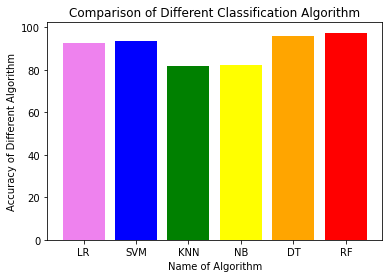

In [ ]:
#Plotting of graph to compare different algorithm
# prepare data
y=[resultLR,resultSVM,resultknn,resultNB,resultDT,resultRF]
x=['LR','SVM','KNN','NB','DT','RF']
# prepare plot
plt.figure()
plt.bar(x,y,color=['violet','blue','green','yellow','orange','red'])
#annotations
plt.title('Comparison of Different Classification Algorithm')
plt.xlabel('Name of Algorithm')
plt.ylabel('Accuracy of Different Algorithm')
#show plot
plt.show()


In [ ]:
#To test our faces i.e. the person is wearing mask or not.
haar_data = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
capture=cv2.VideoCapture(0)
data=[]
font=cv2.FONT_HERSHEY_COMPLEX
while True:
    flag,img=capture.read()
    if flag:
        faces=haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y) ,(x+w,y+h),(255,0,255), 4)
            face=img[y:y+h,x:x+w, :]
            face=cv2.resize(face, (224,224))
            face=face.reshape(1,-1)
            #pred=classifierlin.predict(face)[0]  # Logistic Regression
            #pred=svm.predict(face)[0]            # SVM
            #pred=classifierk.predict(face)[0]    # KNN
            #pred=classifiern.predict(face)[0]    # Naive BAyes
            #pred=clf.predict(face)[0]             # Decision Tree Classification
            pred=classifier.predict(face)[0]     # Random Forest
            n=names[int(pred)]
            cv2.putText(img,n,(x,y),font,1,(244,250,250),2)
            print(n)
        cv2.imshow('result',img)
        #27 - ASCII of Escape key
        if cv2.waitKey(2)==27:
            break
capture.release()
cv2.destroyAllWindows()

WITH_MASK
WITH_MASK
WITHOUT_MASK
WITH_MASK
WITHOUT_MASK
WITH_MASK
WITH_MASK
WITH_MASK
WITH_MASK
WITHOUT_MASK
WITH_MASK
WITH_MASK
WITH_MASK
WITH_MASK
WITH_MASK
WITH_MASK
WITH_MASK
WITH_MASK
WITH_MASK
WITH_MASK
WITH_MASK
WITH_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITH_MASK
WITHOUT_MASK
WITH_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITH_MASK
WITHOUT_MASK
WITH_MASK
WITHOUT_MASK
WITH_MASK
WITHOUT_MASK
WITH_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_MASK
WITHOUT_M

In [ ]:
'''=========================================================================================================================='''

'=========================================================================================================================='